## Support Vector Machines

In [1]:
# Import Libraries
get_ipython().magic('matplotlib inline')
import numpy as np
import matplotlib.pyplot as plt
import scipy.io #Used to load the OCTAVE *.mat files
import scipy.optimize #fmin_cg to train the linear regression
from sklearn import svm #SVM software
from sklearn.svm import SVC 

In [9]:
# Load data
datafile = scipy.io.loadmat('/Users/wiseer85/Documents/Data Science/ML Exercises/data/ex6data1.mat')

# Training set
X, y = datafile['X'], datafile['y'].reshape(-1)

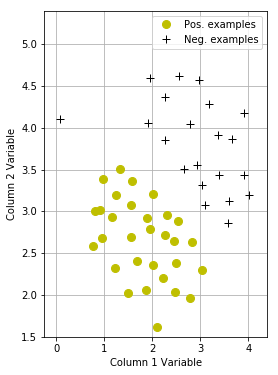

In [12]:
# Plot data
def plotData():
    plt.figure(figsize=(4, 6))
    plt.plot(X[y == 0].T[0], X[y == 0].T[1], 'yo', ms=8, label='Pos. examples')
    plt.plot(X[y == 1].T[0], X[y == 1].T[1], 'k+', ms=8, label='Neg. examples')
    plt.xlim(-0.25, 4.4)
    plt.ylim(1.5, 5.4)
    plt.legend(numpoints = 1, loc = 1)
    plt.xlabel('Column 1 Variable')
    plt.ylabel('Column 2 Variable')
    plt.grid(True)

plotData()

In [8]:
# Define Decision Boundary
def plotBoundary(my_svm, xmin, xmax, ymin, ymax):
    xvals = np.linspace(xmin,xmax,100)
    yvals = np.linspace(ymin,ymax,100)
    zvals = np.zeros((len(xvals),len(yvals)))
    for i in range(len(xvals)):
        for j in range(len(yvals)):
            zvals[i][j] = float(my_svm.predict(np.array([xvals[i],yvals[j]])))
    zvals = zvals.transpose()

    u, v = np.meshgrid(xvals, yvals)
    mycontour = plt.contour(xvals, yvals, zvals, [0])
    plt.title("Decision Boundary")

In [13]:
# Try SVM with C=1 and 'linear' kernel
linear_svm = svm.SVC(C=1, kernel='linear')

# Fit  SVM to X matrix (no bias unit)
linear_svm.fit(X, y.flatten() )

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

ValueError: Expected 2D array, got 1D array instead:
array=[0. 1.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

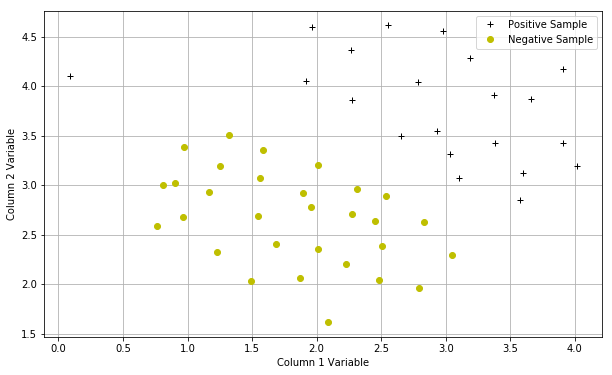

In [14]:
# Plot SVM boundary
plotData()
plotBoundary(linear_svm,0,5,1,5)

In [ ]:
def plotBoundary(X,Y,pred_func):
    # determine canvas borders
    mins = np.amin(X,0); 
    mins = mins - 0.1*np.abs(mins);
    maxs = np.amax(X,0); 
    maxs = maxs + 0.1*maxs;

    ## generate dense grid
    xs,ys = np.meshgrid(np.linspace(mins[0],maxs[0],300), 
            np.linspace(mins[1], maxs[1], 300));


    # evaluate model on the dense grid
    Z = pred_func(np.c_[xs.flatten(), ys.flatten()]);
    Z = Z.reshape(xs.shape)

    # Plot the contour and training examples
    plt.contourf(xs, ys, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=Y, s=50,
            cmap=colors.ListedColormap(['orange', 'blue']))
    plt.show()

In [ ]:
# When C = 100, you should find that the SVM now classifies every 
# single example correctly, but has a decision boundary that does 
# not appear to be a natural fit for the data.
linear_svm = svm.SVC(C=100, kernel='linear')
linear_svm.fit( X, y.flatten() )
plotData()
plotBoundary(linear_svm,0,4.5,1.5,5)

In [ ]:
# Train the SVM with the Gaussian kernel on this dataset.
sigma = 0.1
gamma = np.power(sigma,-2.)
gaus_svm = svm.SVC(C=1, kernel='rbf', gamma=gamma)
gaus_svm.fit( X, y.flatten() )
plotData()
plotBoundary(gaus_svm,0,1,.4,1.0)

In [ ]:
# Use cross validation set to determine best C and parameter to use
Cvalues = (0.01, 0.03, 0.1, 0.3, 1., 3., 10., 30.)
sigmavalues = Cvalues
best_pair, best_score = (0, 0), 0

for Cvalue in Cvalues:
    for sigmavalue in sigmavalues:
        gamma = np.power(sigmavalue,-2.)
        gaus_svm = svm.SVC(C=Cvalue, kernel='rbf', gamma=gamma)
        gaus_svm.fit( X, y.flatten() )
        this_score = gaus_svm.score(Xval,yval)
        #print this_score
        if this_score > best_score:
            best_score = this_score
            best_pair = (Cvalue, sigmavalue)
            
print()"Best C, sigma pair is (%f, %f) with a score of %f."%(best_pair[0],best_pair[1],best_score))

In [ ]:
# Plot boundary
gaus_svm = svm.SVC(C=best_pair[0], kernel='rbf', gamma = np.power(best_pair[1],-2.))
gaus_svm.fit( X, y.flatten() )
plotData()
plotBoundary(gaus_svm,-.5,.3,-.8,.6)



ValueError: Expected 2D array, got 1D array instead:
array=[ 0.   1.5].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

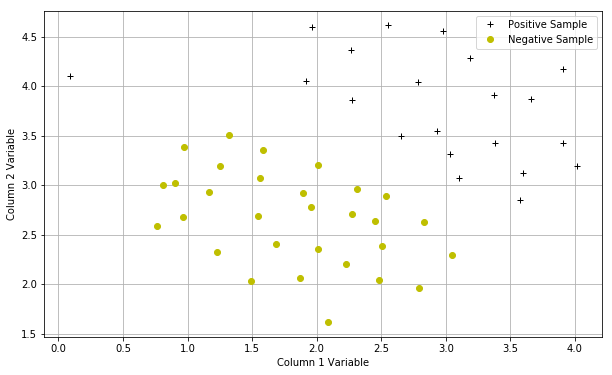

In [25]:
# Plot SVM boundary
def plotBoundary(my_svm, xmin, xmax, ymin, ymax):
    xvals = np.linspace(xmin,xmax,100)
    yvals = np.linspace(ymin,ymax,100)
    zvals = np.zeros((len(xvals),len(yvals)))
    for i in range(len(xvals)):
        for j in range(len(yvals)):
            zvals[i][j] = float(my_svm.predict(np.array([xvals[i],yvals[j]])))
    zvals = zvals.transpose()

    u, v = np.meshgrid( xvals, yvals )
    mycontour = plt.contour(xvals, yvals, zvals, [0])
    plt.title("Decision Boundary")

plotData()
plotBoundary(linear_svm,0,4.5,1.5,5)